In [1]:
# this is to make the Jupyter notebook as wide as the screen (on the Mac at least)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%config InlineBackend.figure_format ='retina'

In [2]:
import BBP_RTQC
from BBP_RTQC_paths import *
import subprocess
import numpy as np
import glob

import json #json manager
import re #regular expressions
import os

import matplotlib.pyplot as plt

In [3]:
f = open("BBP_RTQC_example_tests.json") # open the text file
t = json.load(f) # interpret the text file and make it usable by python
f.close()

In [4]:
a = []
for it,tmp in enumerate(t):
    a.append(json.loads(t[it]))


In [14]:
np.arange(len(a))

array([0, 1, 2, 3, 4, 5, 6, 7])

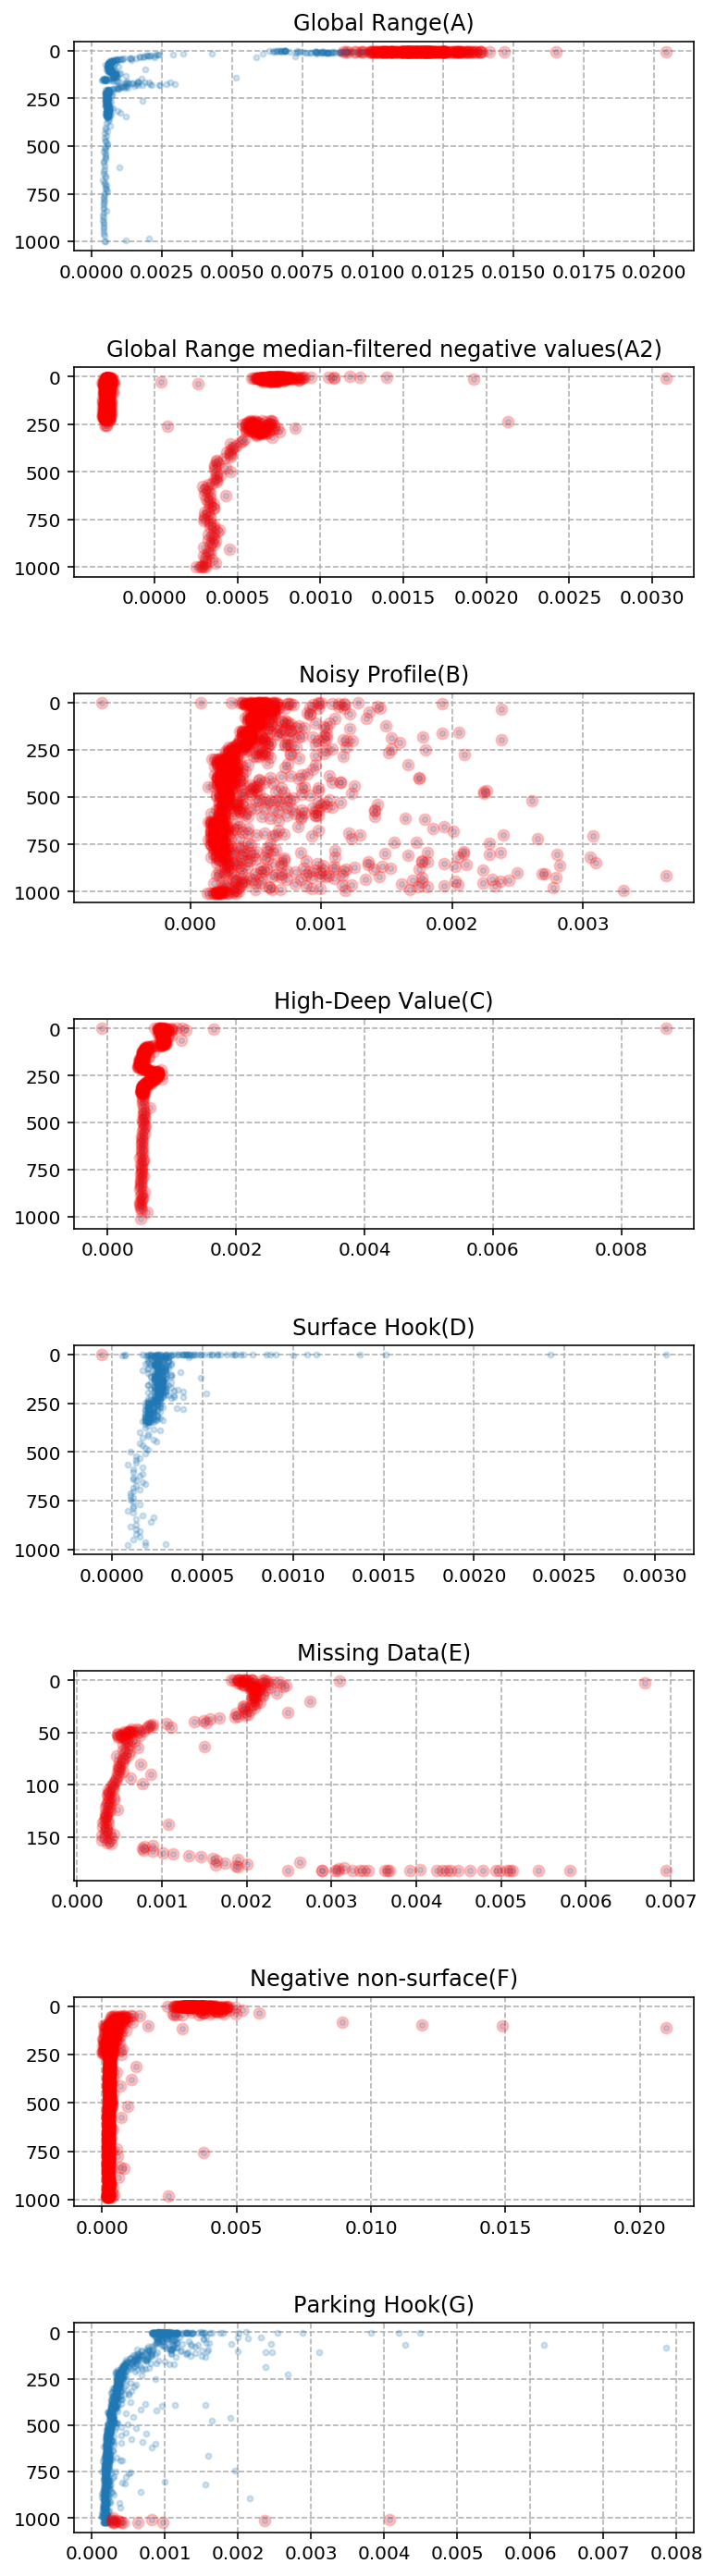

In [21]:
it = 5
fig, ax = plt.subplots(len(a), figsize=(6, 20))
for it in np.arange(len(a)):
    ax[it].plot(a[it]['input']['BBP'], a[it]['input']['PRES'], '.', alpha=0.2)
    iQCed = np.where(np.asarray(a[it]['output']['flags_out'])>1)[0]
    ax[it].plot(np.asarray(a[it]['input']['BBP'])[iQCed], np.asarray(a[it]['input']['PRES'])[iQCed], 'ro', alpha=0.2)
    ax[it].grid('on', linestyle='--')
    ax[it].invert_yaxis()
    ax[it].set_title(a[it]['description'] + "(" + a[it]['code'] + ")")
    # ax.set_ylim([10, 4])
fig.tight_layout(pad=3.0)